<a href="https://colab.research.google.com/github/javadvahid/deepLearning/blob/main/ML_course_project3_logistic_regression_answered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

# رگرسیون لاجستیک(کلاسفیکیشن)

در این پروژه هدف تشخیص قبول شدن یا قبول نشدن یک دانشجو بر اساس دو نمره ثبت شده می باشد

:مشخصات دیتا

دیتای ورودی : نمره دو امتحان

دیتای خروجی : قبول شدن(1) یا قبول نشدن(0) دانشجو

In [ ]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش اول را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه
import pandas as pd
#import numpy
import numpy as np



#read data from project2-data1.csv file
#داده ها را از فایل مشخص شده بخوانید
data1 = pd.read_csv("/content/project3data1.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data1.head()

,exam1,exam2,passed?
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data1.values[:, 0:2]
#output
Y = data1.values[:, 2]

#find m
m = Y.shape[0]
print(m)

100


In [ ]:
print(X.shape, Y.shape)

(100, 2) (100,)


# Data Visualization:

# نمایش داده ها

In [ ]:
#function for plotting data
#تابعی برای نمایش داده ها
import matplotlib.pyplot as plt
def plotData(X, y):
    #Find Indices of pos and neg examples
    #پیدا کردن شماره دیتاهای مربوط به دو دسته 0 و یک

    # پیدا کردن اندیس یا شماره داده هایی با خروجی 1
    pos = (y == 1)
    print(pos)
    #پیدا کردن اندیس یا شماره داده هایی با خروجی 0
    neg = (y == 0)

    #plot positive examples (y==1) using red stars
    #رسم داده های با خروجی 1 با ستاره های قرمز رنگ
    plt.plot(X[pos,0], X[pos,1], 'r*', ms=10)


    #plot negetive examples (y==0) using red stars
    #رسم داده های با خروجی 0 با دایره های آبی رنگ
    plt.plot(X[neg, 0], X[neg, 1], 'bo', ms=8)



[False False False  True  True False  True  True  True  True False False
  True  True False  True  True False  True  True False  True False False
  True  True  True False False False  True  True False  True False False
 False  True False False  True False  True False False False  True  True
  True  True  True  True  True False False False  True False  True  True
  True False False False False False  True False  True  True False  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True False  True  True False  True  True False  True  True  True
  True  True  True  True]


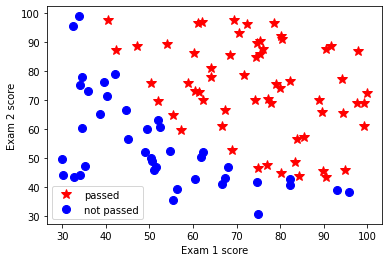

In [ ]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد
plotData(X, Y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
# نمایش راهنمای داده ها
plt.legend(['passed', 'not passed'])


In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (100, 2)
shape of Y: (100,)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
X.shape

(2, 100)

In [ ]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 100)

In [ ]:
#add x0=1 to all the data
#به همه داده ها x0=1 اضافه کردن
X = np.concatenate([np.ones((1, m)), X], axis=0)
X.shape

(3, 100)

# **Cost Function: implementation**

# پیاده سازی تابع هزینه





---
# First method: simple implementation using for loop as shown inthe slide below

روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1jK4vn47UYtZNT1Yqr53I3Otz272MjDbr">
</p>



---
# Second method: vectorized implementation

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1aEQiuNglUyi3rK_wF63BJoBK68oo4qVj">
</p>




In [ ]:
#create a function for sigmoid g = 1/(1 + e^-x)
#ابتدا تابع سیگموید را پیاده سازی کنید
def sigmoid(x):
  g = 1/(1+np.exp(-x))
  return g


In [ ]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند به صورت برداری
def computeCost(X, Y, thetatemp):
  #find m
  m = X.shape[1]

  # compute h using sigmoid function and thetatemp and X
  h = sigmoid(np.matmul(np.transpose(thetatemp), X))

  #use h and compute cost
  #use np.log() for logarithm
  #use np.transpose() for transpose
  #np.matmul() for matrix multiplication
  cost = (-1/m)*(np.matmul(np.log(h), np.transpose(Y)) + np.matmul(np.log(1 - h), np.transpose(1-Y)))

  return cost


In [ ]:
#initialize theta to [[0], [0], [0]]
#انتخاب تتای اولیه به صورت گفته شده
theta = np.array([[0], [0], [0]])

#use the function you created to compute cost for initialized theta
cost = computeCost(X, Y, theta)
print("initial cost is:", cost)

initial cost is: [[0.69314718]]


پاسخ صحیح در صورت پیاده سازی درست  [[0.69314718]]

# **Gradient Descent: implementation**

# پیاده سازی کاهش گرادیان





---
# First method: simple implementation using for loop as shown in the slide below

# روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1xwUXHbSS5K68mrUSkCEiDhqjYDIbtusP">
</p>



---
# Second method: vectorized implementation

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1Eb3FNgaRyMfQXzFWToxmRp2TX5pqLCAt">
</p>




In [ ]:
#create a function for gradient descent
def gradientDescent(X, Y, thetatemp, lr, epochs):
  m = X.shape[1]
  print(m)
  J_history = []
  for epoch in range(epochs):
    h = sigmoid(np.matmul(np.transpose(thetatemp), X))
    temp = np.transpose(h - Y)
    thetatemp = thetatemp - (lr/m) * np.matmul(X, temp)
    J_history.append(computeCost(X, Y, thetatemp)[0, 0])

  return thetatemp, J_history

In [ ]:
#مقادیر را به گونه ای تغییر دهید که یک مرز تصمیم مناسب دو دسته داده را از هم جدا کند
#راهنمایی : تابع مهزینه در نهایت باید مقدار نزدیک به 0.2 داشته باشد
#initialize theta and train logistic regression
#انتخاب مقادیر اولیه 0 برای تتا
theta = np.array([[0], [0], [0]])

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 1000000
lr = 0.004
#run gradientDescent and print theta and last cost

thetanew, J_history = gradientDescent(X, Y, theta, lr, epochs)
#print theta
print(thetanew)

#print last cost >>> J_history[-1]
print("last cost: ", J_history[-1])




100
[[-24.70878572]
 [  0.20261206]
 [  0.19780967]]
last cost:  0.2035286344115374


In [ ]:
#function for plotting data
#تابعی برای نمایش داده ها
import matplotlib.pyplot as plt
def plotData(X, y):
    #Find Indices of pos and neg examples
    #پیدا کردن شماره دیتاهای مربوط به دو دسته 0 و یک

    # پیدا کردن اندیس یا شماره داده هایی با خروجی 1
    pos = (y == 1)

    #پیدا کردن اندیس یا شماره داده هایی با خروجی 0
    neg = (y == 0)

    #plot positive examples (y==1) using red stars
    #رسم داده های با خروجی 1 با ستاره های قرمز رنگ
    plt.plot(X[pos,0], X[pos,1], 'r*', ms=10)


    #plot negetive examples (y==0) using red stars
    #رسم داده های با خروجی 0 با دایره های آبی رنگ
    plt.plot(X[neg, 0], X[neg, 1], 'bo', ms=8)



(3, 100) (100,)


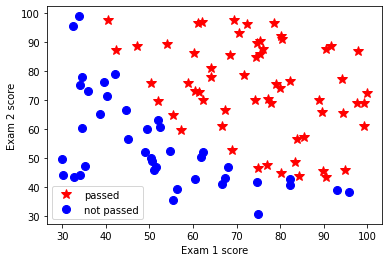

In [ ]:
#Decision Boundary visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد
print(X.shape, Y[0,:].shape)
plotData(np.transpose(X[1:, :]), Y[0,:])

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
# نمایش راهنمای داده ها
plt.legend(['passed', 'not passed'])


In [ ]:
#this function helps you plot the decision boundary
#این تابع به شما کمک میکند تا مرز تصمیم را رسم کنید
#آن را اجرا کنید
def plotDecisionBoundary(plotData, theta, X, y):

    #make sure theta is a numpy array
    theta = np.array(theta)


    #Plot Data (remember first column in X is the intercept)
    plotData(X, y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Passed', 'Not Passed', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(np.array([ui, vj], ndmin=2)), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)



In [ ]:
print("shape of X is: ", X.shape)
print("shape of Y is: ", Y.shape)

shape of X is:  (3, 100)
shape of Y is:  (1, 100)


(1, 100)


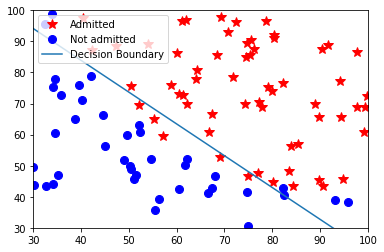

In [ ]:
#convert X shape to (100, 2) (first delete x0 column then transpose)
#Convert Y shape to (100,) >> use indexing Y[0, :]
#برای استفاده از تابع رسم مرز تصمیم Y  و  X تبدیل ابعاد
#فراخوانی تابع
plotDecisionBoundary(plotData, thetanew, np.transpose(X[1:, :]), Y[0,:])

# Predict

In [ ]:
#h(x) = sigmoid()
#create a predict function that returns probability and class(use threshold 0.5)
#تابعی بنویسید که تخمین مدل را هم به صورت احتمال بین 0 تا 1 و هم به صورت کلاس های مشخص شده برگرداند
#از مقدار آستانه 0.5 استفاده کنید
def predict(thetatemp, X):
  prediction_prob = sigmoid(np.matmul(np.transpose(thetatemp), X))
  prediction_class = prediction_prob.copy()
  prediction_class[prediction_class >= 0.5] = 1
  prediction_class[prediction_class < 0.5] = 0

  return prediction_prob, prediction_class


In [ ]:
#call the predict function and print the output of model for all data X
prediction_prob, prediction_class = predict(thetanew, X)

#print prediction_prob
print(prediction_prob)
#print prediction_class
print(prediction_class)
#print real classes >> Y
print(Y[0,:])

[[9.45266735e-02 5.07028468e-05 4.63131930e-02 9.89621653e-01
  9.97990877e-01 1.17225750e-02 9.98845641e-01 4.25793786e-01
  9.99665447e-01 7.32951252e-01 9.06806487e-01 3.05758266e-02
  9.99172677e-01 9.99829229e-01 1.60161797e-01 9.79617331e-01
  4.30020721e-01 1.53363565e-01 9.99661272e-01 5.74205346e-01
  7.01398498e-02 9.98463271e-01 8.11674543e-03 1.19516425e-04
  9.91189616e-01 8.51414811e-01 5.99855626e-01 8.62054535e-01
  9.62071804e-02 1.81006713e-02 8.93737802e-01 9.79779567e-01
  1.59249061e-01 3.94301197e-01 7.73694512e-02 3.52078765e-02
  8.48159024e-01 9.86595149e-01 2.08835740e-01 5.21526161e-02
  9.68602533e-01 6.71970549e-03 9.99387131e-01 5.03700120e-01
  4.95829817e-03 1.41419047e-01 9.92375747e-01 9.99995246e-01
  9.99097803e-01 9.99988674e-01 9.97890475e-01 9.99431092e-01
  9.02044548e-01 3.12023411e-03 9.30075242e-03 5.56645508e-02
  9.99832922e-01 6.90416109e-01 9.84432349e-01 9.95306708e-01
  9.99464310e-01 2.59036820e-04 3.89257216e-03 1.49429580e-04
  7.4883

# Logistic Regression with regularization




#  رگرسیون لاجستیک(کلاسفیکیشن) به همراه مقید سازی

در این پروژه میخواهیم با استفاده از مقادیر دو آزمایش انجام شده برروی میکروچیپ ها

تشخیص بدیم که آیا کفیت چیپ ها قابل قبول هست(1) یا نیست(0)

:مشخصات دیتا

دیتای ورودی : نتایج تست 1 و تست 2

دیتای خروجی :کیفیت قابل قبول(1) یا کیفیت غیرقابل قبول(0)

In [ ]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش اول را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه
import pandas as pd
#import numpy
import numpy as np



#read data from project2-data1.csv file
#داده ها را از فایل مشخص شده بخوانید
data2 = pd.read_csv("/content/project3data2.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data2.head()

,test1,test2,Quality
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data2.values[:, 0:2]
#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]
print(m)

118


In [ ]:
print(X.shape, Y.shape)

(118, 2) (118,)


# Data Visualization:

# نمایش داده ها

In [ ]:
#function for plotting data
#تابعی برای نمایش داده ها
import matplotlib.pyplot as plt
def plotData(X, y):
    #Find Indices of pos and neg examples
    #پیدا کردن شماره دیتاهای مربوط به دو دسته 0 و یک

    # پیدا کردن اندیس یا شماره داده هایی با خروجی 1
    pos = (y == 1)

    #پیدا کردن اندیس یا شماره داده هایی با خروجی 0
    neg = (y == 0)

    #plot positive examples (y==1) using red stars
    #رسم داده های با خروجی 1 با ستاره های قرمز رنگ
    plt.plot(X[pos,0], X[pos,1], 'r*', ms=10)


    #plot negetive examples (y==0) using red stars
    #رسم داده های با خروجی 0 با دایره های آبی رنگ
    plt.plot(X[neg, 0], X[neg, 1], 'bo', ms=8)



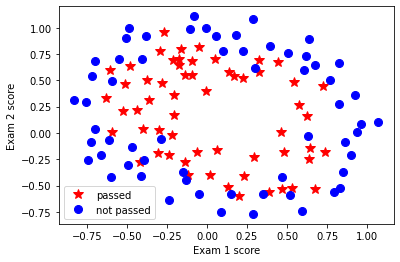

In [ ]:
#Data visualization
#نمایش داده ها اولین قدم بعد از لود کردن داده ها می باشد
plotData(X, Y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
# نمایش راهنمای داده ها
plt.legend(['passed', 'not passed'])


as you saw above, the classes can not be separated using a line

همانطور که میبینید داده ها را نمی توان توسط یک خط در دو کلاس جدا قرار داد

we need a non-linear decision boundary

ما باید از یک مرز تصمیم غیر خطی استفاده کنیم

so we first must create new features using the mapFeature function

برای اینکار ما باید ویژگی های جدیدی به صورت زیر توسط تابع آورده شده ، ایجاد کنیم

<p align="center" width="100%">
    <img width="70%" src="https://drive.google.com/uc?id=1_gi7UyIuIQePo13IsdqtSi-idXZvctTo">
</p>

In [ ]:
#with the function below u can create polynomial features
#keep in mind that this function adds x0 so we dont need to do it later
#راه اضافه میکند x0 دقت کنید که این تابع

def mapFeature(X, degree=6):
    X1 = X[:,0]
    X2 = X[:,1]
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [ ]:
#call mapFeature with degree=6 to create new features
X = mapFeature(X, 6)
print(X.shape)

(118, 28)


In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (118, 28)
shape of Y: (118,)


# creating X and Y matrices with the right dimensions as shown in the slide

# دقیقا به صورتی که در اسلاید زیر نمایش داده شده است X,Y ایجاد ماتریس

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [ ]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
X.shape

(28, 118)

In [ ]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, 1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
Y.shape

(1, 118)

# **Cost Function with Regularization: implementation**

# پیاده سازی تابع هزینه





---
# First method: simple implementation using for loop as shown inthe slide below

روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1dTN9GmNaKcM5ZIScH2P_vVLjG77t5sjg">
</p>



---
# Second method: vectorized implementation

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1aEQiuNglUyi3rK_wF63BJoBK68oo4qVj">
</p>




In [ ]:
#create a function for sigmoid g = 1/(1 + e^-x)
#ابتدا تابع سیگموید را پیاده سازی کنید
def sigmoid(x):
  g = 1/(1+np.exp(-x))
  return g


In [ ]:
#create a function for computing cost J
#تابعی بنویسید که تابع هزینه را محاسبه کند به صورت برداری
def computeCostWithReg(X, Y, thetatemp, lambda_):
  #find m
  m = X.shape[1]

  # compute h using sigmoid function and thetatemp and X
  h = sigmoid(np.matmul(np.transpose(thetatemp), X))

  #use h and compute cost
  #use np.log() for logarithm
  #use np.transpose() for transpose
  #np.matmul() for matrix multiplication
  cost = (-1/m)*(np.matmul(np.log(h), np.transpose(Y)) + np.matmul(np.log(1 - h), np.transpose(1-Y)))
  costWithReg = cost + (lambda_/(2*m)) * np.matmul(np.transpose(thetatemp[1:]), thetatemp[1:])

  return costWithReg


In [ ]:
#initialize theta to a zero vector of shape (X.shape[0],1)>>> np.zeros((X.shape[0],1))
#انتخاب تتای اولیه به صورت گفته شده
theta = np.zeros((X.shape[0], 1))

#use the function you created to compute cost for initialized theta
costWithReg = computeCostWithReg(X, Y, theta, lambda_=1)
print("initial cost is:", costWithReg)

initial cost is: [[0.69314718]]


پاسخ صحیح در صورت پیاده سازی درست  [[0.69314718]]

# **Gradient Descent with Regularization: implementation**

#  پیاده سازی کاهش گرادیان همراه با مقید سازی





---
# First method: simple implementation using for loop as shown in the slide below

# روش اول: پیاده سازی ساده با استفاده از حلقه به صورت نشان داده شده در اسلاید زیر


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1906OIZGT-MUITqOD34_93Y7eg1ZHutjP">
</p>



---
# Second method: vectorized implementation

# روش دوم: پیاده سازی به صورت برداری


<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1v7z__YImgydKcngc4hnFdEsEbKBUO1L6">
</p>




In [ ]:
#create a function for gradient descent with regularization
#
def gradientDescentWithReg(X, Y, thetatemp, lr, epochs, lambda_):
  m = X.shape[1]
  print(m)
  J_history = []
  for epoch in range(epochs):
    thetatempreg = thetatemp.copy()
    thetatempreg[0] = 0
    h = sigmoid(np.matmul(np.transpose(thetatemp), X))
    temp = np.transpose(h - Y)
    thetatemp = thetatemp - (lr/m) * (np.matmul(X, temp) + (lambda_)*thetatempreg)
    if(epoch==0):
      grad = (1/m) * (np.matmul(X, temp) + (lambda_) * thetatempreg)
    J_history.append(computeCostWithReg(X, Y, thetatemp, lambda_)[0, 0])

  return thetatemp, J_history, grad

In [ ]:
#مقادیر را به گونه ای تغییر دهید که یک مرز تصمیم مناسب دو دسته داده را از هم جدا کند

#initialize theta and train logistic regression
#انتخاب مقادیر اولیه 0 برای تتا
theta = np.ones((X.shape[0], 1))

#set epochs and learning rate
#مقدار دهی برای نرخ یادگیری، تعداد تکرار
epochs = 500000
lr = 0.01
#run gradientDescent and print theta and last cost

thetanew, J_history, gradtest = gradientDescentWithReg(X, Y, theta, lr, epochs, lambda_=1)
#print theta
#print(thetanew)

#print first epoch grad
#print(gradtest*250)
#print last cost >>> J_history[-1]
print("last cost: ", J_history[-1])




118
last cost:  0.5290027297126465


In [ ]:
#this function helps you plot the decision boundary
#این تابع به شما کمک میکند تا مرز تصمیم را رسم کنید
#آن را اجرا کنید
def plotDecisionBoundary(plotData, theta, X, y):

    #make sure theta is a numpy array
    theta = np.array(theta)


    #Plot Data (remember first column in X is the intercept)
    plotData(X, y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Passed', 'Not Passed', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(np.array([ui, vj], ndmin=2)), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)



In [ ]:
print("shape of X is: ", X.shape)
print("shape of Y is: ", Y.shape)

shape of X is:  (3, 100)
shape of Y is:  (1, 100)


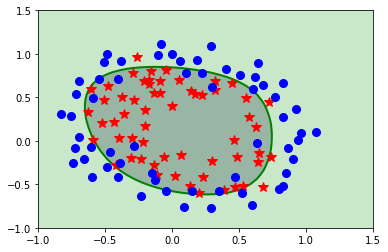

In [ ]:
#convert X shape to (100, 2) (first delete x0 column then transpose)
#Convert Y shape to (100,) >> use indexing Y[0, :]
#برای استفاده از تابع رسم مرز تصمیم Y  و  X تبدیل ابعاد
#فراخوانی تابع
#train you model with different parameters of lr and epochs and lamba_ to find a model with a good decision boundary
#مدل را با پارامتر های مختلف آموزش دهید تا تاثیر این پارامتر ها برروی مرز تصمیم را مشاهده کنید
#بعد از هر آموزش با استفاده از دستوری زیر مرز تصمیم را رسم کنید
plotDecisionBoundary(plotData, thetanew, np.transpose(X[1:, :]), Y[0,:])

# Predict

In [ ]:
#h(x) = sigmoid()
#create a predict function that returns probability and class(use threshold 0.5)
#تابعی بنویسید که تخمین مدل را هم به صورت احتمال بین 0 تا 1 و هم به صورت کلاس های مشخص شده برگرداند
#از مقدار آستانه 0.5 استفاده کنید
def predict(thetatemp, X):
  prediction_prob = sigmoid(np.matmul(np.transpose(thetatemp), X))
  prediction_class = prediction_prob.copy()
  prediction_class[prediction_class >= 0.5] = 1
  prediction_class[prediction_class < 0.5] = 0

  return prediction_prob, prediction_class


In [ ]:
#call the predict function and print the output of model for all data X
prediction_prob, prediction_class = predict(thetanew, X)

#print prediction_prob
print(prediction_prob)
#print prediction_class
print(prediction_class)
#print real classes >> Y
print(Y[0,:])

[[0.69870864 0.71818023 0.6997773  0.72976458 0.65045331 0.62411883
  0.66975563 0.63411427 0.63582099 0.58130625 0.53404229 0.51692701
  0.58122092 0.48082381 0.63001795 0.71395422 0.77647099 0.56051842
  0.70039467 0.62427515 0.5204142  0.53188877 0.49043651 0.51927412
  0.60455313 0.51318746 0.53458141 0.39394757 0.78062899 0.58963224
  0.24113709 0.58520986 0.7351991  0.76690725 0.7412227  0.7161136
  0.65604096 0.72048274 0.74695849 0.65387509 0.72894579 0.69857614
  0.60402021 0.74505358 0.64621583 0.68058431 0.42084162 0.77119569
  0.56066466 0.61757914 0.76640767 0.81226188 0.78268816 0.79089001
  0.77610918 0.69007616 0.73305737 0.66472501 0.23645461 0.543707
  0.69840702 0.36495511 0.28437827 0.47423242 0.30637168 0.10455925
  0.3148748  0.10050989 0.13725686 0.27141737 0.19370882 0.23483476
  0.2073477  0.23391823 0.27250944 0.46301709 0.61182229 0.52754861
  0.32428009 0.32694809 0.52886504 0.56425235 0.43812895 0.54858994
  0.18975058 0.36593744 0.33373258 0.33737012 0.620

# Use scikit learn for logistic regression

In [ ]:
#load data set from a csv file
# csv لود کردن داده های موجود از یک فایل
# در اولین مرحله فایل مربوط به دیتای بخش دوم را آپلود کنید
#import pandas libaray for reading a csv file
# به برنامه pandas اضافه کردن کتابخونه
import pandas as pd

#read data from project2-data2.csv file
#داده ها را از فایل مشخص شده بخوانید
data2 = pd.read_csv("/content/project3data2.csv")

#show a summary of data
#نمایش خلاصه ای از داده ها
data2.head()

,test1,test2,Quality
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
data2.tail

<bound method NDFrame.tail of         test1     test2  Quality
0    0.051267  0.699560        1
1   -0.092742  0.684940        1
2   -0.213710  0.692250        1
3   -0.375000  0.502190        1
4   -0.513250  0.465640        1
..        ...       ...      ...
113 -0.720620  0.538740        0
114 -0.593890  0.494880        0
115 -0.484450  0.999270        0
116 -0.006336  0.999270        0
117  0.632650 -0.030612        0

[118 rows x 3 columns]>

In [ ]:
#split the data into input X and output Y
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]


In [ ]:
#with the function below u can create polynomial features
#keep in mind that this function adds x0 so we dont need to do it later
#راه اضافه میکند x0 دقت کنید که این تابع

def mapFeature(X, degree=6):
    X1 = X[:,0]
    X2 = X[:,1]
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [ ]:
#call mapFeature with degree=6 to create new features
X = mapFeature(X, 6)
print(X.shape)

(118, 28)


In [ ]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (118, 28)
shape of Y: (118,)


In [ ]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [ ]:
#predict for input test1=0.2 and test2= 0.8
test1 = 0.25
test2 = 0.25
model.predict(mapFeature(np.array([test1, test2], ndmin=2)))

array([1.])